In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________
import GETFF

In [3]:
def PSM_theory(x):
    numerator = (0.4133 * x - 0.1038 * x**2 + 0.01252 * x**3 + 0.007748 * x**4)
    denominator = (1 + 0.9771 * x - 0.3506 * x**2 + 0.09863 * x**3 + 0.009927 * x**4 + 0.000002173 * x**5)
    return numerator / denominator
x=np.linspace(0,10,1000)
y=np.zeros(len(x))
for i in range(0,len(x)):
    y[i]=PSM_theory(x[i])

In [4]:
muN=1.9103
#muN=1
pas="1"
#2
GEGM2=np.sum(np.load(f'SavedArrays/GEN2/Pass{pas}/GEGM.npy'))
GEGM2E=np.sum(np.load(f'SavedArrays/GEN2/Pass{pas}/GEGME.npy'))
#3
GEGM3=np.sum(np.load(f'SavedArrays/GEN3/Pass{pas}/GEGM.npy'))
GEGM3E=np.sum(np.load(f'SavedArrays/GEN3/Pass{pas}/GEGME.npy'))
#4
GEGM4=np.sum(np.load(f'SavedArrays/GEN4/Pass{pas}/GEGM.npy'))
GEGM4E=np.sum(np.load(f'SavedArrays/GEN4/Pass{pas}/GEGME.npy'))

In [5]:
GEGM3E


0.09205694352323068

In [6]:
GEGM3E


0.09205694352323068

In [7]:
muN*GEGM2

0.4847315879194152

In [8]:
muN*GEGM3

0.8074624015622572

In [9]:
muN*GEGM3E

0.17585637921242758

In [10]:
GEN2Data = {
    'Q2': [3, 6.83, 9.82],
    'ExpName': ['GEn-II', 'GEn-II', 'GEn-II'],
    'R': [abs(muN*GEGM2), abs(muN*GEGM3), abs(muN*GEGM4)],
    'R_err': [abs(muN*GEGM2E),abs(muN*GEGM3E),abs(muN*GEGM4E)],
    'GEn': [0.01, 0.02, 0.03],   # assuming GEn and GEn_err are present in the file
    'GEn_err': [0.001, 0.002, 0.003]
}

In [11]:
GEN2Data

{'Q2': [3, 6.83, 9.82],
 'ExpName': ['GEn-II', 'GEn-II', 'GEn-II'],
 'R': [0.4847315879194152, 0.8074624015622572, 0.8928728043983359],
 'R_err': [0.035786597796588764, 0.17585637921242758, 0.5378854622415686],
 'GEn': [0.01, 0.02, 0.03],
 'GEn_err': [0.001, 0.002, 0.003]}

# CRYPTIC CODE___________________________

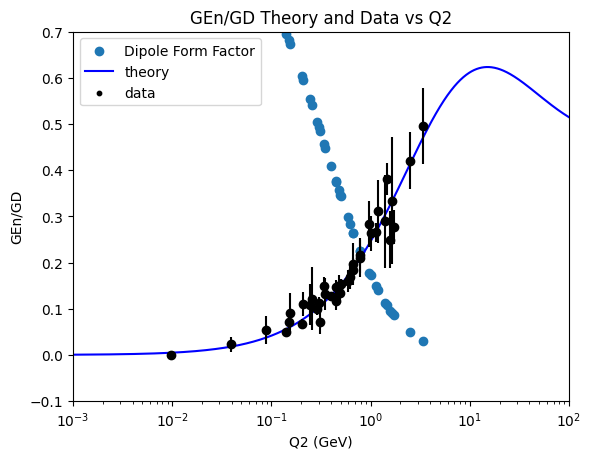

In [12]:
def Dipole(Q2):
    return (1+Q2/.71)**-2

GEndata = np.transpose(np.loadtxt('../DB/GLOBFIT17_gen_feb07.out'))
GEntheory = np.transpose(np.loadtxt('../DB/neutron_lookup.dat'))
Q2 = GEndata[0]
Q2t = GEntheory[0]
Q2t = np.sort(Q2t)
GEntrat=GEntheory[1]
GEn = GEndata[1]
GEnerr = GEndata[2]
rat = np.zeros(len(GEn))
raterr = np.zeros(len(GEnerr))
dipole = np.zeros(len(Q2))
for i in range(0,len(Q2)):
    dipole[i]=Dipole(Q2[i])
    


plt.scatter(Q2,dipole,label='Dipole Form Factor')
#plt.title('Dipole Form Factor vs Q2 from GEn Data')
#plt.xlabel('Q2')
#plt.ylabel('GD')
for i in range(0,len(GEn)):
    rat[i]=GEn[i]/dipole[i]
    raterr[i]=GEnerr[i]/dipole[i]
plt.plot(Q2t,GEntrat,color='blue',label='theory')
plt.xlim((10**(-3),10**2))
plt.ylim((-.1,.7))
plt.xscale('log')
plt.title("GEn/GD Theory and Data vs Q2")
plt.xlabel('Q2 (GeV)')
plt.ylabel('GEn/GD')
plt.scatter(Q2,rat,color='black',s=10, label='data')
plt.errorbar(Q2,rat,yerr=raterr,color='black',fmt='o')
plt.legend(loc='upper left')

#  End CRYPTIC CODE____________________________

# arrington 2017 fit

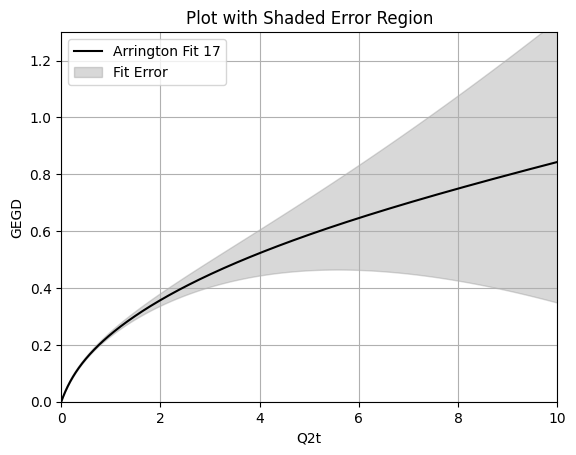

In [13]:
GETFF.Function_GETFF(3,Q2t[i])[0]

GEGD=np.empty(0)
GEGDE=np.empty(0)

GMGD=np.empty(0)
GMGDE=np.empty(0)

for i in range(0,len(Q2t)):
    GEGD=np.append(GEGD,GETFF.Function_GETFF(3,Q2t[i])[0])
    GEGDE=np.append(GEGDE,GETFF.Function_GETFF(3,Q2t[i])[1])
    GMGD=np.append(GMGD,GETFF.Function_GETFF(4,Q2t[i])[0])
    GMGDE=np.append(GMGDE,GETFF.Function_GETFF(4,Q2t[i])[1])

len(GEGDE)

#Error Prop

def eprop(GE, GEE, GM, GMM):
    R = GE / GM
    relative_error_GE = GEE / GE
    relative_error_GM = GMM / GM
    fractional_uncertainty_R = np.sqrt(relative_error_GE**2 + relative_error_GM**2)
    delta_R = R * fractional_uncertainty_R
    return R, delta_R

RatFit,RatFitE=eprop(GEGD,GEGDE,GMGD,GMGDE)

plt.figure()
plt.plot(Q2t, RatFit, color='black',label='Arrington Fit 17')  # Plot the main line


# Calculate the upper and lower bounds of the shaded area
upper_bound = RatFit+RatFitE
lower_bound = RatFit-RatFitE

# Add shaded region
plt.fill_between(Q2t, lower_bound, upper_bound, color='gray', alpha=0.3,label='Fit Error')

# Set other plot properties
#plt.xscale('log')
plt.xlabel('Q2t')
plt.ylabel('GEGD')
plt.title('Plot with Shaded Error Region')
plt.grid(True)
plt.legend(loc='upper left')
plt.xlim(0,10)
plt.ylim(0,1.3)
plt.show()

In [14]:
GEN2Data['Q2']
GEN2Data

{'Q2': [3, 6.83, 9.82],
 'ExpName': ['GEn-II', 'GEn-II', 'GEn-II'],
 'R': [0.4847315879194152, 0.8074624015622572, 0.8928728043983359],
 'R_err': [0.035786597796588764, 0.17585637921242758, 0.5378854622415686],
 'GEn': [0.01, 0.02, 0.03],
 'GEn_err': [0.001, 0.002, 0.003]}

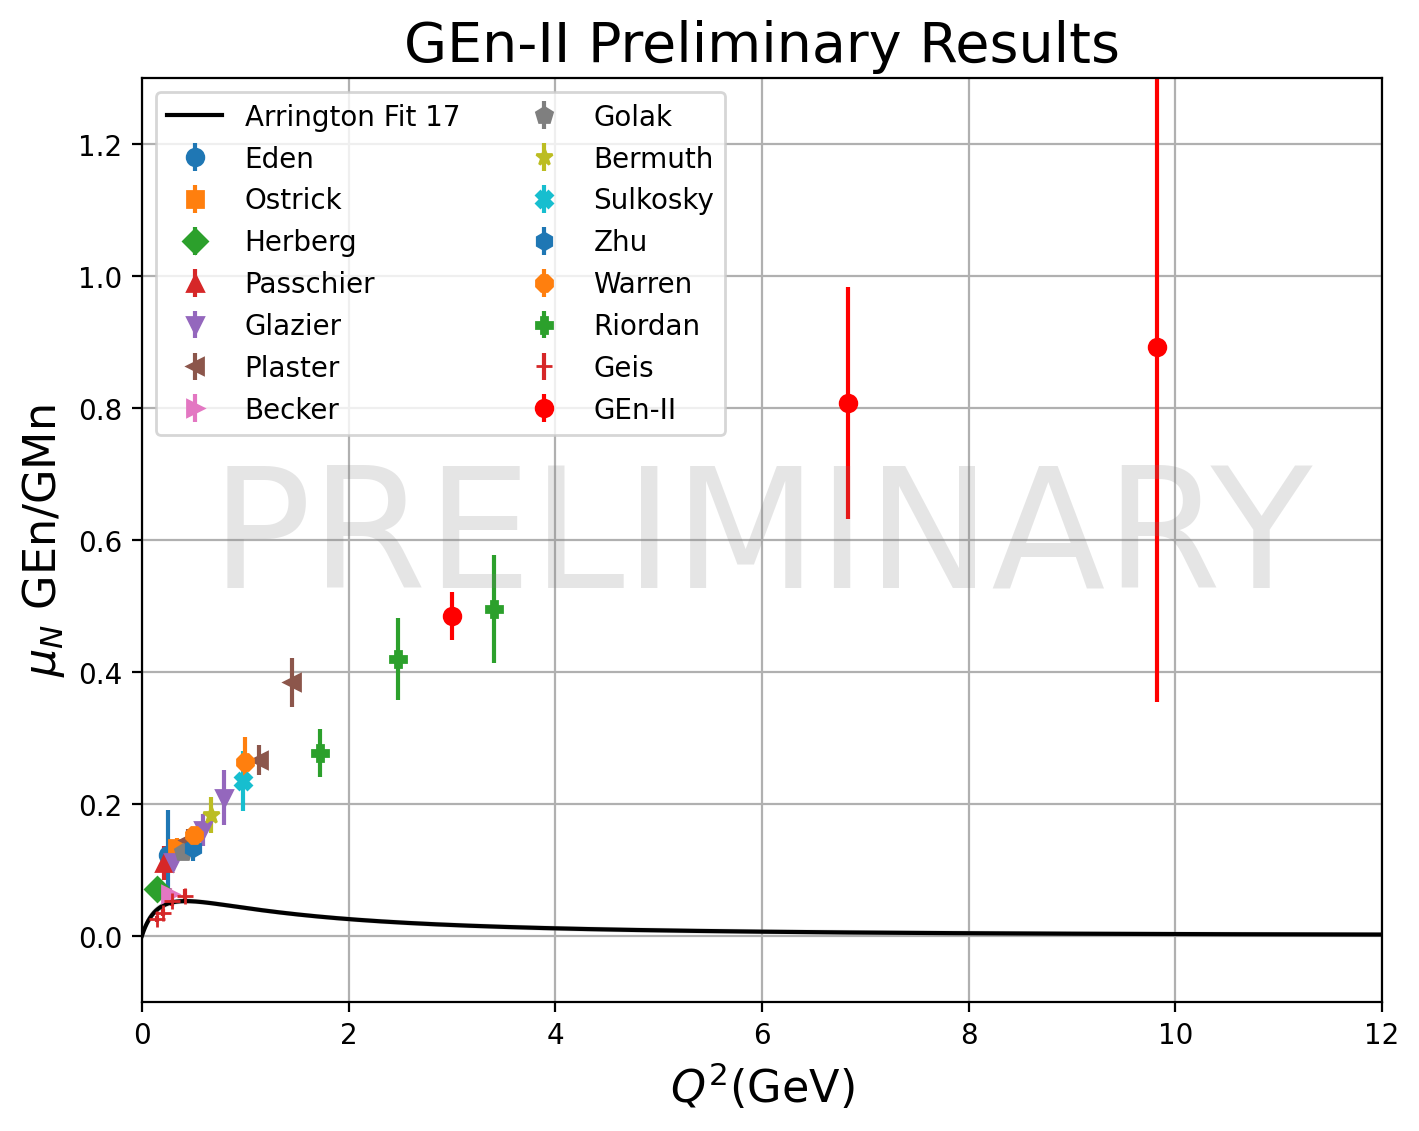

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../DB/GEn_World_Data.csv")
file_path = '../DB/worlddat.dat'
data = pd.read_csv(file_path)
fig, ax = plt.subplots(figsize=(8, 6),dpi=200)


mu_n=1.91

"""
additional_data_df = pd.DataFrame(GEN2Data)
data = pd.concat([data, additional_data_df], ignore_index=True)

groups = data.groupby('ExpName')
colors=['red','black','black','black','black']
labels=['GEn-II Experiment','','','','']
for color, labels, (name, group) in zip(colors,labels, groups):
    ax.errorbar(group['Q2'], group['R'], yerr=group['R_err'], fmt='o', color= color,label=labels)
"""

marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'X', 'h', '8', 'P', '+', 'x', '|', '_']
experiments = df["Experiment"].unique()
markers = {exp: marker_styles[i % len(marker_styles)] for i, exp in enumerate(experiments)}

# Create plot

# Plot each experiment with different marker styles
for exp in experiments:
    subset = df[df["Experiment"] == exp]
    plt.errorbar(subset["Q2"], subset["GEn"]*mu_n/subset["GMn"],subset["RatE"], fmt=markers[exp], label=exp)


plt.errorbar(GEN2Data['Q2'],GEN2Data['R'],GEN2Data['R_err'],fmt='o',color='red',label='GEn-II')
#plt.errorbar(GEN2Data['Q2'],[0,0,0],[0,0,0],fmt='o',color='red',label='GEn-II')
#ax.set_title(r'$\mu_n\frac{GE_n}{GM_n}$ vs $Q^2$',fontsize='20')
#plt.plot(x,y,'--',label="PSM",color='red')
#plt.plot(Q2t,GEntrat,color='blue',label='global fit')
#plt.scatter(Q2,rat,color='black',s=10, label='World Data')
#plt.errorbar(Q2,rat,yerr=raterr,color='black',fmt='o')
ax.legend(loc='upper left')
plt.ylim(0,1.3)
plt.xlim(0,12)
#plt.xlim((10**(-1),10**2))
#plt.ylim((-.1,.6))
#plt.xscale('log')

#Fit---------------------------------
plt.plot(Q2t, RatFit, color='black',label='Arrington Fit 17')  # Plot the main line
upperRatFit = RatFit+RatFitE
lowerRatFit = RatFit-RatFitE
plt.fill_between(Q2t, upperRatFit, lowerRatFit, color='gray', alpha=0.3)
plt.grid(True)
plt.legend(loc='upper left',fontsize=10,ncol=2)

#Watermark---------------------------------------
plt.text(0.5, 0.5, 'PRELIMINARY', fontsize=60, color='gray', ha='center', va='center',
         alpha=0.2, transform=plt.gca().transAxes)
plt.xlabel('$Q^2$(GeV)',fontsize=16)
plt.ylabel('$\mu_N$ GEn/GMn',fontsize=16)
plt.title('GEn-II Preliminary Results',fontsize=20)
#plt.title('GEn-II World Data',fontsize=20)

plt.xlim(0,12)
plt.ylim(-.1,1.3)
plt.savefig("PrelimResults.pdf")
plt.show()


# Final Result

In [16]:
import pandas as pd

def load_data(file_path):
    """
    Load the data from the given file path into a pandas DataFrame.
    """
    columns = [
        "Q2", "GEn/GD", "dGEn/GD", "dGEn_Par/GD", "GMn/mu_n/GD", "dGMn/mu_n/GD", "dGMn_Par/mu_n/GD"
    ]
    data = pd.read_csv(file_path, delim_whitespace=True, comment='#', names=columns)
    return data

def find_closest_row(data, input_Q2):
    """
    Find the row in the data with the Q2 value closest to the input_Q2.
    """
    closest_row = data.iloc[(data['Q2'] - input_Q2).abs().argmin()]
    return closest_row

def get_GMn_value(input_Q2):
    """
    Load the data and return the GMn/mu_n/GD value for the closest Q2.
    """
    file_path='../DB/neutron_lookup.dat'
    data = load_data(file_path)
    closest_row = find_closest_row(data, input_Q2)
    return closest_row["GMn/mu_n/GD"]
def get_GEn_value(input_Q2):
    """
    Load the data and return the GMn/mu_n/GD value for the closest Q2.
    """
    file_path='../DB/neutron_lookup.dat'
    data = load_data(file_path)
    closest_row = find_closest_row(data, input_Q2)
    return closest_row["GEn/GD"]

In [17]:
GEN2Data

{'Q2': [3, 6.83, 9.82],
 'ExpName': ['GEn-II', 'GEn-II', 'GEn-II'],
 'R': [0.4847315879194152, 0.8074624015622572, 0.8928728043983359],
 'R_err': [0.035786597796588764, 0.17585637921242758, 0.5378854622415686],
 'GEn': [0.01, 0.02, 0.03],
 'GEn_err': [0.001, 0.002, 0.003]}

In [18]:
kin2resultratio=GEN2Data['R'][0]
kin3resultratio=GEN2Data['R'][1]
kin4resultratio=GEN2Data['R'][2]
kin2resultratioE=GEN2Data['R_err'][0]
kin3resultratioE=GEN2Data['R_err'][1]
kin4resultratioE=GEN2Data['R_err'][2]

In [19]:
#3 6.83 9.82

In [20]:
Dipole(.71)

0.25

In [21]:
q2t=np.linspace(0,10,1000)
genfit=np.empty(0)

for i in range(0,len(q2t)):
    genfit=np.append(genfit,get_GEn_value(q2t[i])*Dipole(q2t[i]))

In [22]:
gmnkin2=get_GMn_value(3)*Dipole(3)

gmnkin3=get_GMn_value(6.83)*Dipole(6.83)

gmnkin4=get_GMn_value(9.82)*Dipole(9.82)

In [23]:
kin2FinalResult=kin2resultratio*gmnkin2
kin3FinalResult=kin3resultratio*gmnkin3
kin4FinalResult=kin4resultratio*gmnkin4

kin2FinalResultE=kin2resultratioE*gmnkin2
kin3FinalResultE=kin3resultratioE*gmnkin3
kin4FinalResultE=kin4resultratioE*gmnkin4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


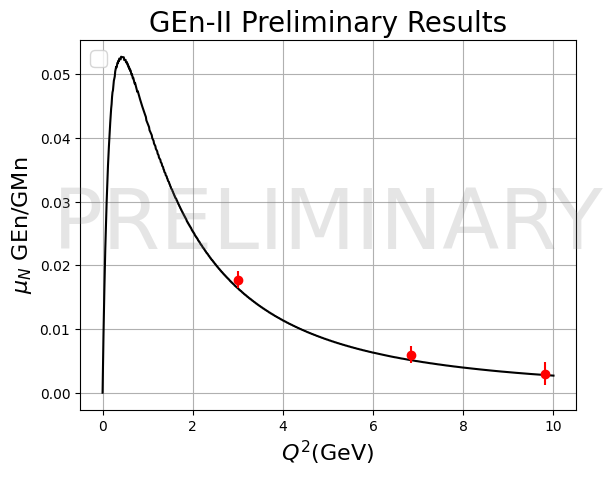

In [24]:

plt.plot(q2t,genfit,color='black')
plt.errorbar(3,kin2FinalResult,kin2FinalResultE,color='red')
plt.plot(3,kin2FinalResult,'.',color='red',markersize=12)

plt.errorbar(6.83,kin3FinalResult,kin3FinalResultE,color='red')
plt.plot(6.83,kin3FinalResult,'.',color='red',markersize=12)

plt.errorbar(9.82,kin4FinalResult,kin4FinalResultE,color='red')
plt.plot(9.82,kin4FinalResult,'.',color='red',markersize=12)

plt.text(0.5, 0.5, 'PRELIMINARY', fontsize=60, color='gray', ha='center', va='center',
         alpha=0.2, transform=plt.gca().transAxes)
plt.xlabel('$Q^2$(GeV)',fontsize=16)
plt.ylabel('$\mu_N$ GEn/GMn',fontsize=16)
plt.title('GEn-II Preliminary Results',fontsize=20)
plt.savefig("PrelimResults.pdf")
plt.grid(True)
plt.legend(loc='upper left',fontsize=15)
plt.show()

In [25]:
Q2t = GEntheory[0]
Q2t = np.sort(Q2t)

In [26]:
data

,Q2,ExpName,R,R_err,GEn,GEn_err
0,0.447,Madey,0.1460,0.0200,0.0550,0.0076
1,1.132,Madey,0.2510,0.0250,0.0550,0.0041
2,1.450,Madey,0.3630,0.0380,0.0411,0.0048
3,0.142,Geis,0.0505,0.0103,0.0236,0.0038
4,0.203,Geis,0.0505,0.0123,0.0246,0.0035
5,0.291,Geis,0.0695,0.0173,0.0253,0.0036
6,0.415,Geis,0.1022,0.0234,0.0163,0.0031
7,1.720,Riordan,0.2730,0.0500,0.0236,0.0031
8,2.480,Riordan,0.4120,0.0840,0.0208,0.0031
9,3.410,Riordan,0.4960,0.1130,0.0147,0.0024


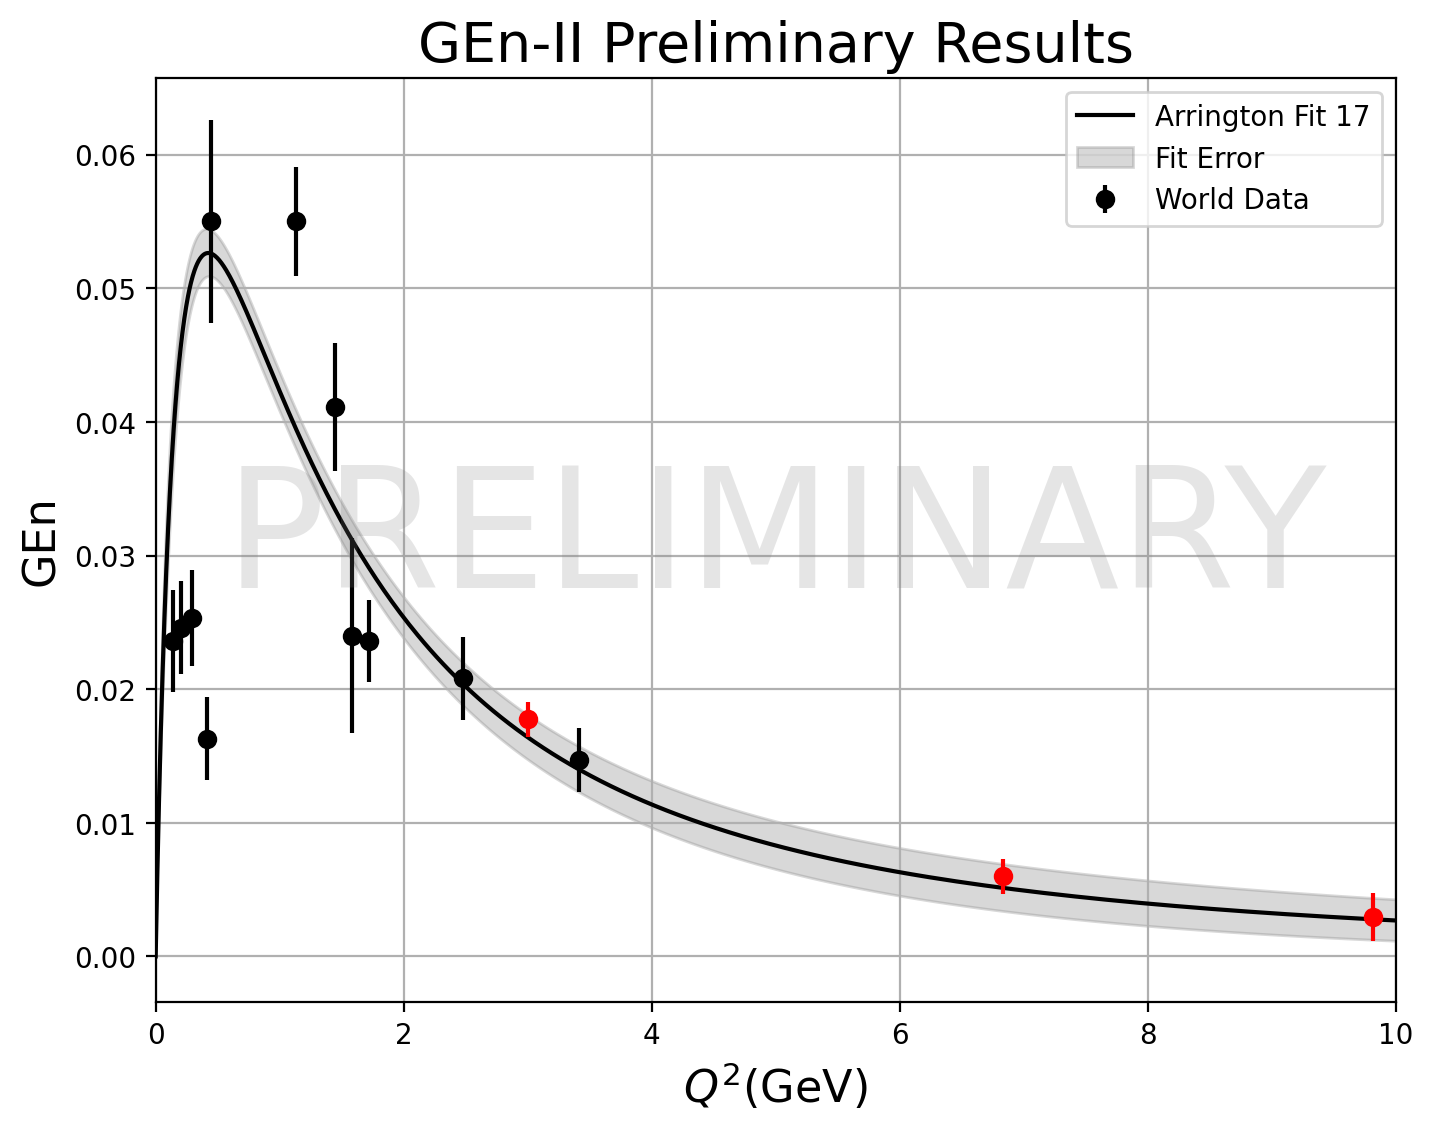

In [27]:
GETFF.Function_GETFF(3,Q2t[i])[0]

GEGD=np.empty(0)
GEGDE=np.empty(0)

GMGD=np.empty(0)
GMGDE=np.empty(0)

for i in range(0,len(Q2t)):
    GEGD=np.append(GEGD,GETFF.Function_GETFF(3,Q2t[i])[0]*Dipole(Q2t[i]))
    GEGDE=np.append(GEGDE,GETFF.Function_GETFF(3,Q2t[i])[1]*Dipole(Q2t[i]))
    GMGD=np.append(GMGD,GETFF.Function_GETFF(4,Q2t[i])[0])
    GMGDE=np.append(GMGDE,GETFF.Function_GETFF(4,Q2t[i])[1])

len(GEGDE)

#Error Prop

def eprop(GE, GEE, GM, GMM):
    R = GE
    delta_R = GEE
    return R, delta_R

RatFit,RatFitE=eprop(GEGD,GEGDE,GMGD,GMGDE)

fig, ax = plt.subplots(figsize=(8, 6),dpi=200)
plt.plot(Q2t, RatFit, color='black',label='Arrington Fit 17')  # Plot the main line


# Calculate the upper and lower bounds of the shaded area
upper_bound = RatFit+RatFitE
lower_bound = RatFit-RatFitE

# Add shaded region

file_path = '../DB/worlddat.dat'
data = pd.read_csv(file_path)
groups = data.groupby('ExpName')
colors=['black','black','black','black']
labels=['World Data','','','']
for color, labels, (name, group) in zip(colors,labels, groups):
    ax.errorbar(group['Q2'], group['GEn'], yerr=group['GEn_err'], fmt='o', color= color,label=labels)


plt.fill_between(Q2t, lower_bound, upper_bound, color='gray', alpha=0.3,label='Fit Error')

plt.errorbar(3,kin2FinalResult,kin2FinalResultE,color='red')
plt.plot(3,kin2FinalResult,'.',color='red',markersize=12)

plt.errorbar(6.83,kin3FinalResult,kin3FinalResultE,color='red')
plt.plot(6.83,kin3FinalResult,'.',color='red',markersize=12)

plt.errorbar(9.82,kin4FinalResult,kin4FinalResultE,color='red')
plt.plot(9.82,kin4FinalResult,'.',color='red',markersize=12)
plt.text(0.5, 0.5, 'PRELIMINARY', fontsize=60, color='gray', ha='center', va='center',
         alpha=0.2, transform=plt.gca().transAxes)
plt.xlabel('$Q^2$(GeV)',fontsize=16)
plt.ylabel('GEn',fontsize=16)
plt.title('GEn-II Preliminary Results',fontsize=20)
#plt.savefig("PrelimResults.pdf")
# Set other plot properties
#plt.xscale('log')

plt.grid(True)
plt.legend(loc='upper right')
plt.xlim(0,10)
plt.show()

In [28]:
from math import sqrt
sqrt(.0020**2+.0014**2)

0.0024413111231467405

In [29]:
sqrt(.0024**2+.0019**2)

0.0030610455730027933